# KNN Projekt

#### Načítanie datasetu:

In [1]:
import numpy as np
import dataset

/home/anakin/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Initializing the data manager
Data manager initialization finished


In [3]:
import importlib
importlib.reload(dataset)

<module 'dataset' from '/home/anakin/skola/leto/KNN/scripts/dataset.py'>

In [2]:
# loading a locally stored dataset that contains 10 data points
data_set = dataset.load_data_set('../res/cache/datasets/322_without_one_char_words_with_sentences') 

In [3]:
import model
import visualise

#### Vizualizácia jedného datového bodu z datasetu:

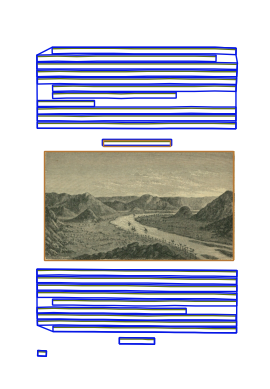

In [7]:
for dp in data_set.data_points[:1]:
    visualise.plot_text_regions(dp)

In [9]:
import importlib
importlib.reload(model)

<module 'model' from '/home/anakin/skola/leto/KNN/scripts/model.py'>

# Vyhodnotenie datasetu:

a) Vyhodnocovanie datasetu pomocou clipu, kde sú do clipu posielané iba jednotlivé riadky datasetu

In [ ]:
import tqdm

In [6]:
chunk_size = 1
model_results = []

for i in tqdm.tqdm(range(0, len(data_set.data_points), chunk_size)):
    chunk = data_set.data_points[i:i+chunk_size]
    model_results.extend([ model.compute_clip_probs(data_point) for data_point in chunk])

100%|██████████| 322/322 [00:57<00:00,  5.62it/s]


Výsledkom tohto vyhodnotenia sú jednotlivé riadky uložné s ich vzdialenosťami a informáciami o riadkoch.

In [22]:
model_results[:1]

[{<annotation.ImageAnnotation at 0x7fe2f1828dd0>: [(<parse_xml.TextLine at 0x7fe2b28048d0>,
    0.9919999837875366),
   (<parse_xml.TextLine at 0x7fe36204f290>, 0.0068962182849645615),
   (<parse_xml.TextLine at 0x7fe36204f910>, 0.0005660760216414928),
   (<parse_xml.TextLine at 0x7fe36204dd50>, 0.0003406705509405583),
   (<parse_xml.TextLine at 0x7fe36204fb90>, 6.655996548943222e-05),
   (<parse_xml.TextLine at 0x7fe2f1828090>, 5.306624007062055e-05),
   (<parse_xml.TextLine at 0x7fe36204f450>, 4.1652165236882865e-05),
   (<parse_xml.TextLine at 0x7fe36204eed0>, 1.1476378858787939e-05),
   (<parse_xml.TextLine at 0x7fe36204e990>, 7.644915967830457e-06),
   (<parse_xml.TextLine at 0x7fe36204ec50>, 5.21338006365113e-06),
   (<parse_xml.TextLine at 0x7fe36204ea10>, 4.060184892296093e-06),
   (<parse_xml.TextLine at 0x7fe36204f550>, 3.9972373997443356e-06),
   (<parse_xml.TextLine at 0x7fe36204f610>, 1.553158995193371e-06),
   (<parse_xml.TextLine at 0x7fe36204e210>, 1.1815810694315587e-0

In [7]:
eval_results = [model.eval_clip_result(dp, clip) for dp, clip in zip(data_set, model_results)]
eval_results

Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`


[{<annotation.ImageAnnotation at 0x7f4fbe48d050>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe4b2690>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe4bbfd0>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe4c79d0>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe4d7e50>: 0.8947368421052632},
 {<annotation.ImageAnnotation at 0x7f4fbe3206d0>: 0.751054852320675},
 {<annotation.ImageAnnotation at 0x7f4fbe346650>: 0.9655172413793104},
 {<annotation.ImageAnnotation at 0x7f4fbe36e1d0>: 0.6460176991150443},
 {<annotation.ImageAnnotation at 0x7f4fbe3ae650>: 0.9793510324483776},
 {<annotation.ImageAnnotation at 0x7f4fbe3d1f50>: 0.8303030303030303},
 {<annotation.ImageAnnotation at 0x7f4fbe3db590>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe3df990>: 0.7878787878787878},
 {<annotation.ImageAnnotation at 0x7f4fbc7b8250>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbc7ced90>: 0.4294117647058824},
 {<annotation.ImageAnnotation at 0x7f4fbc7efb50>: 0.9316239316239316},
 {<annotation.ImageAnnotat

Výpočet výslednej efektivity modelu:

In [8]:
np.mean([el for val in eval_results for el in list(val.values())])

0.8450349695564776

b) Vyhodnocovanie datasetu pomocou clipu, kde sú do clipu posielané jednotlivé vety z datasetu.

In [10]:
chunk_size = 1
model_results = []

for i in tqdm.tqdm(range(0, len(data_set.data_points), chunk_size)):
    chunk = data_set.data_points[i:i+chunk_size]
    model_results.extend([ model.compute_clip_probs_sentence(data_point) for data_point in chunk])

100%|██████████| 322/322 [00:38<00:00,  8.38it/s]


In [11]:
eval_results = [model.eval_clip_result(dp, clip) for dp, clip in zip(data_set, model_results)]
eval_results

Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`
Missing text annotations, possibly filtered due to overlapping with image ...
setting `score=0.0`


[{<annotation.ImageAnnotation at 0x7f4fbe48d050>: 0.6521739130434783},
 {<annotation.ImageAnnotation at 0x7f4fbe4b2690>: 0.7857142857142857},
 {<annotation.ImageAnnotation at 0x7f4fbe4bbfd0>: 0.8461538461538461},
 {<annotation.ImageAnnotation at 0x7f4fbe4c79d0>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe4d7e50>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe3206d0>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe346650>: 0.9523809523809523},
 {<annotation.ImageAnnotation at 0x7f4fbe36e1d0>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe3ae650>: 0.5202020202020202},
 {<annotation.ImageAnnotation at 0x7f4fbe3d1f50>: 0.4818181818181818},
 {<annotation.ImageAnnotation at 0x7f4fbe3db590>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbe3df990>: 0.6521739130434783},
 {<annotation.ImageAnnotation at 0x7f4fbc7b8250>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbc7ced90>: 1.0},
 {<annotation.ImageAnnotation at 0x7f4fbc7efb50>: 0.6897689768976898},
 {<annotation.ImageAnnotation at 0x7f4fb

Výpočet výslednej efektivity modelu

In [12]:
np.mean([el for val in eval_results for el in list(val.values())])

0.7755343965249718